In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('order.csv')
t=data.iloc[:,:-8]

In [32]:
class KMeans:
    def __init__(self,times,k):
        self.times=times
        self.k=k
    def fit(self,X):
        X=np.asarray(X)
        np.random.seed(0)
        self.cluster_center_=X[np.random.randint(0,len(X),self.k)]
        self.labels_=np.zeros(len(X))
        for t in range(self.times):
            for index,x in enumerate(X):
                dis=np.sqrt(np.sum((x-self.cluster_center_)**2,axis=1))
                self.labels_[index]=np.argmin(dis)
            for i in range(self.k):
                self.cluster_center_[i]=np.mean(X[self.labels_==i],axis=0)
    def predict(self,X):
        X=np.asarray(X)
        for index,x in enumerate(X):
            dis=np.sqrt(np.sum((x-self.cluster_center_)**2,axis=1))
            labels[index]=np.argmin(dis)
            return(labels)

In [24]:
km=KMeans(times=20,k=3)
km.fit(t)
km.cluster_center_
#result=km.predict(t[29000:,:])
#display(result)

array([[1.65206000e+03, 4.94100000e+03, 3.26244055e+01, 1.14984610e+01,
        3.69331175e+00, 1.49950420e+01],
       [8.30733552e+03, 2.49625000e+04, 3.03758189e+01, 6.92970220e+00,
        3.59003375e+00, 1.50950963e+01],
       [5.01434770e+03, 1.49040000e+04, 3.22378771e+01, 6.99151050e+00,
        3.64472767e+00, 1.50130439e+01]])

In [25]:
t[km.labels==0]

,customer,order,total_items,discount%,weekday,hour
0,0,0,45,23.03,4,13
1,0,1,38,1.22,5,13
2,0,2,51,18.08,4,13
3,1,3,57,16.51,1,12
4,1,4,53,18.31,2,11
5,1,5,8,23.89,4,13
6,1,6,35,17.26,1,10
7,1,7,12,6.61,4,8
8,1,8,35,22.29,1,12
9,1,9,44,20.39,2,12


In [39]:
t2 = data.loc[:, "Food%":"Fresh%"]
kmeans = KMeans(20, 3)
kmeans.fit(t2)

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

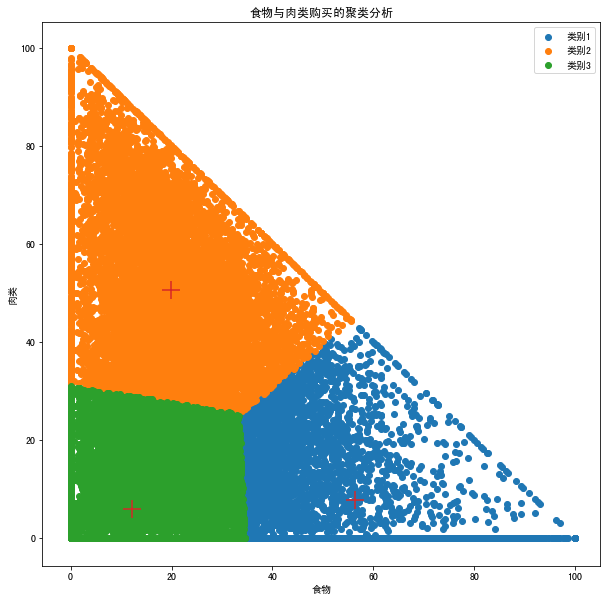

In [41]:
plt.figure(figsize=(10, 10))
# 绘制每个类别的散点图
plt.scatter(t2[kmeans.labels_ == 0].iloc[:, 0], t2[kmeans.labels_ == 0].iloc[:, 1], label="类别1")
plt.scatter(t2[kmeans.labels_ == 1].iloc[:, 0], t2[kmeans.labels_ == 1].iloc[:, 1], label="类别2")
plt.scatter(t2[kmeans.labels_ == 2].iloc[:, 0], t2[kmeans.labels_ == 2].iloc[:, 1], label="类别3")
# 绘制聚类中心
plt.scatter(kmeans.cluster_center_[:, 0], kmeans.cluster_center_[:, 1], marker="+", s=300)
plt.title("食物与肉类购买的聚类分析")
plt.xlabel("食物")
plt.ylabel("肉类")
plt.legend()
plt.show()